In [1]:
'''
Two Variable Logistic Regression Implementation in Python
Finds the optimum parameters and plots decision boundary
'''
import math
import matplotlib.pyplot as plt
import pandas as pd

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def hypothesis(theta_0, theta_1, theta_2, x1, x2):
    '''
    Hypothesis returns sigmoid(zeta), where zeta is ThetaTransposed * X
    since this is only two variable hypothesis, this is computed using the
    scalar products without using matrix multiplication
    '''
    zeta = theta_0 + (theta_1 * x1) + (theta_2 * x2)
    return sigmoid(zeta)

In [3]:
def sigmoid(zeta):
    '''Sigmoid hypothesis for a given zeta value, returns value between 0 and 1'''
    ret = 1 / (1 + (math.exp(-1 * zeta)))
    return ret

In [4]:
def compute_cost(theta_0, theta_1, theta_2, df):
    '''cost function'''
    cost = 0
    for i in range(1, len(df)):
        cur_sig = hypothesis(theta_0, theta_1, theta_2, df.iloc[i-1]['X1'], df.iloc[i-1]['X2'])
        if df.iloc[i-1]['Y'] == 1 and cur_sig != 0:
            cost = cost + math.log(cur_sig)
        elif cur_sig != 1:
            cost = cost + math.log(1 - cur_sig)
    return cost * (-1/len(df))

In [5]:
def derivative(cost_fn, theta_0, theta_1, theta_2, partial, df):
    '''Computes the numerical partial derivative of a function.'''
    change_in_input = 0.000001
    cost_one = cost_fn(theta_0, theta_1, theta_2, df)
    if partial == 1: # theta_0
        theta_0 = theta_0 + change_in_input
    elif partial == 2: # theta_1
        theta_1 = theta_1 + change_in_input
    elif partial == 3: # theta_2
        theta_2 = theta_2 + change_in_input
    cost_two = cost_fn(theta_0, theta_1, theta_2, df)
    change_in_output = (cost_two - cost_one)
    slope = change_in_output / change_in_input
    return slope

In [6]:
def gradient_descent(costfn, df):
    '''Computes gradient_descent of given cost function'''
    theta_0 = -100
    theta_1 = 1
    theta_2 = 1
    min_cost = costfn(theta_0, theta_1, theta_2, df)
    while True:
        cur_cost = costfn(theta_0, theta_1, theta_2, df)
        if cur_cost < min_cost:
            min_cost = cur_cost
        do_0 = derivative(costfn, theta_0, theta_1, theta_2, 1, df)
        do_1 = derivative(costfn, theta_0, theta_1, theta_2, 2, df)
        do_2 = derivative(costfn, theta_0, theta_1, theta_2, 3, df)
        alpha = 0.01
        theta_0 = theta_0 - (alpha * do_0)
        theta_1 = theta_1 - (alpha * do_1)
        theta_2 = theta_2 - (alpha * do_2)
        print("cost:%0.10f | theta:%0.10f, %0.10f, %0.10f" % (cur_cost, theta_0, theta_1, theta_2))
        # stopping at a reasonable cost
        if (abs(min_cost) < 0.45) and (abs(do_0) <= 0.1 and abs(do_1) <= 0.1 and abs(do_2) <= 0.1):
            return [theta_0, theta_1, theta_2]

          X1         X2  Y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
           X1         X2  Y
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1
cost:4.0132698350 | theta:-100.0022358855, 0.8663092707, 0.8629297927
cost:0.7808040533 | theta:-100.0031364094, 0.8082954879, 0.8083520865
cost:0.4280852293 | theta:-100.0031260005, 0.8067571305, 0.8065290280
cost:0.4278532126 | theta:-100.0030828167, 0.8075307002, 0.8064530031
Final theta_vec
[-100.00308281666473, 0.8075307002209922, 0.8064530031499642]


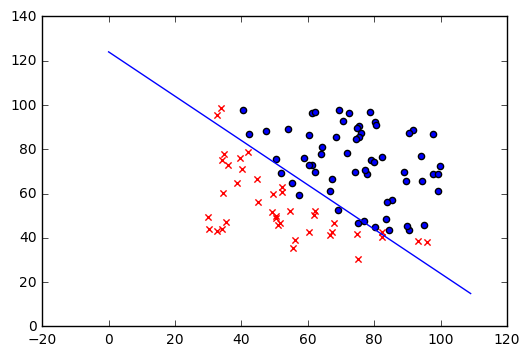

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/avannaldas/Machine-Learning/master/Datasets/student_admit_prediction.csv')
print(df.head())
print(df.tail())

theta_vec = gradient_descent(compute_cost, df)
print('Final theta_vec')
print(theta_vec)

plt.scatter(df[df['Y'] == 1]['X1'], df[df['Y'] == 1]['X2'], marker='o', c='b')
plt.scatter(df[df['Y'] == 0]['X1'], df[df['Y'] == 0]['X2'], marker='x', c='r')

decision_boundary = [(((theta_vec[1] * i) + theta_vec[0])/(-1 * theta_vec[2])) for i in range(0,110)]
plt.plot(range(0, 110), decision_boundary)

plt.show()